## Hands-on - Probability Distributions and Variability

In [195]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr, kendalltau

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/refs/heads/main/fcc-forum-pageviews.csv"
df = pd.read_csv(file_path)

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset


# Convert to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

Dataset Preview:
         date  value
0  2016-05-09   1201
1  2016-05-10   2329
2  2016-05-11   1716
3  2016-05-12  10539
4  2016-05-13   6933


### **Question 1: Check for missing values**
- Check for any **missing values** in each colum.

In [196]:
for column in df:
    missing_counts = df[column].isnull().sum()
    print(f"Missing Data Count for column {column}:\n", missing_counts)

Missing Data Count for column value:
 0


### **Question 2: Compute the Covariance Between Consecutive Days**
- Create a new column: **Previous Day Views"**, which contains the previous day's pageviews.
- Compute the covariance between **"value"** (current day's views) and **"Previous Day Views"**.



Covariance matrix:
                 value      previous
value     3.521193e+09  2.417820e+09
previous  2.417820e+09  3.517486e+09


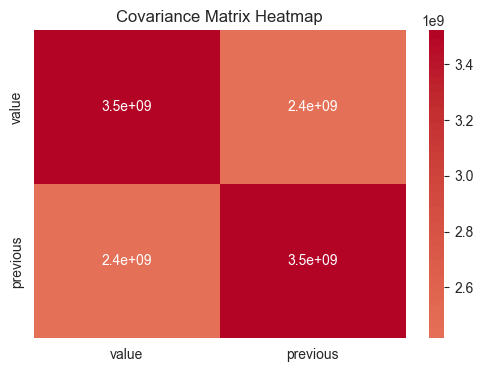

In [197]:
# Add column for value of previous row in df
df['previous'] = df['value'].shift(1)

# Create covariance matrix
cov_matrix = df[['value', 'previous']].cov()

# Print results
print("\nCovariance matrix:")
print(cov_matrix)

# Plot results
plt.figure(figsize=(6, 4))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Covariance Matrix Heatmap")

# Show the plot
plt.show()

### **Question 3: Compute Pearson, Spearman, and Kendall Correlation Between Pageviews and Previous Day Views**
- Compute and compare three different correlation measures.?


Pearson Correlation:
             value  previous
value     1.000000  0.687073
previous  0.687073  1.000000

Spearman Correlation:
             value  previous
value     1.000000  0.932921
previous  0.932921  1.000000

Kendall Correlation:
             value  previous
value     1.000000  0.788719
previous  0.788719  1.000000


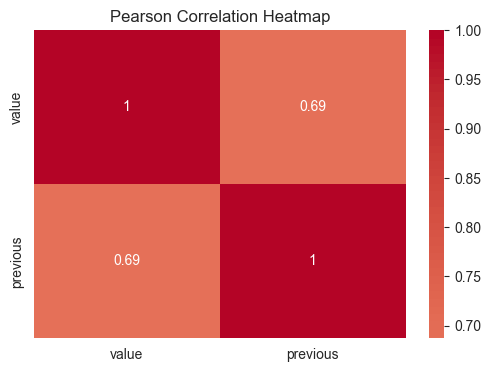

In [198]:
# Calculate different correlation matrices
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
kendall_corr = df.corr(method='kendall')

# Print results
print("\nPearson Correlation:")
print(pearson_corr)

print("\nSpearman Correlation:")
print(spearman_corr)

print("\nKendall Correlation:")
print(kendall_corr)

# Plot results
plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson Correlation Heatmap")

# Show plot
plt.show()

### **Question 4: Train a Simple Linear Regression Model to Predict Pageviews**
- Convert **"date"** to numeric values (days since the start).
- Train a linear regression model to predict **"value"** (pageviews) using time.**.


In [199]:
# Create column for number of days
start_date = df.index[0]
df['days_from_start'] = (df.index - start_date).days

# Define features
x = df[['days_from_start']]
y = df['value']

# Train model
model = LinearRegression()
model.fit(x, y)

print('Model trained for "value" based on days since start')

Model trained for "value" based on days since start


### **Question 5: Evaluate the Regression Model**
- Compute R-squared and Mean Squared Error (MSE).
- Discuss the model's performance.


In [200]:
# Predict values:
y_pred = model.predict(x)

# Print R-squared and Mean Squared Error
print("R-squared:", r2_score(y, y_pred)) 
print("Values closer to 1 mean better fit, so this model is low fit.")
print("\nMean Squared Error:", mean_squared_error(y, y_pred))
print("Mean Square Error is the average error amount squared, lower is better.")

R-squared: 0.33111819824912136
Values closer to 1 mean better fit, so this model is low fit.

Mean Squared Error: 2353455648.871661
Mean Square Error is the average error amount squared, lower is better.


### **Question 6: Test Whether Pageviews Have Increased Over Time**
- Compare mean pageviews in the first 30 days vs. the last 30 days.
- Perform a one-sample T-test

In [201]:
# Separate first 30 days and last 30 days
first_30 = df.head(30)
last_30 = df.tail(30)

# Get mean for both
mean_first_30 = first_30['value'].mean()
mean_last_30 = last_30['value'].mean()
print(f"Mean page views for first 30 days: {mean_first_30:.2f}")
print(f"Mean page views for last 30 days: {mean_last_30:.2f}")

# Perform a one-sample T-test. I used ttest_1samp instead of the imported ttest_ind, as it is two sample. I tested the full mean against the first 30 days, to see if mean changes over time.

t_stat, p_val = ttest_1samp(df.mean(), popmean=mean_first_30)

# Output results
print("\nOne-sample T-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.6f}")

# Interpretation guide
if p_val < 0.05:
    print("✅ Result: Reject the null hypothesis — the mean is significantly different.")
else:
    print("ℹ️ Result: Fail to reject the null — no significant difference from the hypothesized mean.")


Mean page views for first 30 days: 11683.03
Mean page views for last 30 days: 184514.47

One-sample T-test Results:
T-statistic: 1.5026
P-value: 0.271802
ℹ️ Result: Fail to reject the null — no significant difference from the hypothesized mean.
